In [1]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from tqdm import * #progress bar

import os
import json

# Factual API
from factual import Factual # https://github.com/Factual/factual-python-driver
from factual.utils import circle

%matplotlib inline

### Factual PoC

Factual API TODOs in order to make it work on your localhost:
 1. run in terminal "pip install factual-api" without ""
 2. sign up for a Factual API key here: https://www.factual.com/contact/new#free_api_access
 3. Set up your key and secret as environment variables - FACTUAL_API_KEY and FACTUAL_API_SECRET respectively
    
    3.1. On mac you just open .bash_profile and add two lines: 
     
     export FACTUAL_API_KEY=your_key
     
     export FACTUAL_API_SECRET=your_secret
     
    3.2. Restart shell and run jupyter notebook in this newly restarted shell (terminal)
     
 4. ...profit ;)

In [2]:
# You can verify that your env variables are ok with:
print(os.environ['FACTUAL_API_KEY'])
print(os.environ['FACTUAL_API_SECRET'])

6OevA0na9Y4SJAoIERS0trkVkeXymeZMIPirGrK9
ew5txyN5bgAAOdzE89k1g5ulquy741nwF0uDg65W


In [3]:
factual = Factual(os.environ['FACTUAL_API_KEY'], os.environ['FACTUAL_API_SECRET'])

In [4]:
places = factual.table('places-ch')
places.schema()

{'description': 'Businesses and Places of Interest',
 'fields': [{'datatype': 'String',
   'description': 'Business/POI name',
   'faceted': False,
   'label': 'Name',
   'multivalued': False,
   'name': 'name',
   'q_searchable': True,
   'searchable': True,
   'sortable': True,
   'writable': True},
  {'datatype': 'String',
   'description': 'Address number and street name',
   'faceted': False,
   'label': 'Address',
   'multivalued': False,
   'name': 'address',
   'q_searchable': True,
   'searchable': True,
   'sortable': True,
   'writable': True},
  {'datatype': 'String',
   'description': 'Additional address, incl. suite numbers',
   'faceted': False,
   'label': 'Address Extended',
   'multivalued': False,
   'name': 'address_extended',
   'q_searchable': False,
   'searchable': True,
   'sortable': False,
   'writable': True},
  {'datatype': 'String',
   'description': 'PO Box. As they do not represent the physical location of a brick-and-mortar store, PO Boxes are often exc

In [5]:
places.data()

[{'address': 'Binningerstrasse 40',
  'category_ids': [371],
  'category_labels': [['Social', 'Zoos, Aquariums and Wildlife Sanctuaries']],
  'country': 'ch',
  'factual_id': '6aa834ab-8ed1-459a-93ea-4ce2223c26ae',
  'fax': '061 281 00 05',
  'hours': {'friday': [['8:00', '17:00']],
   'monday': [['5:00', '7:00'], ['10:00', '15:00']],
   'saturday': [['9:00', '16:00']],
   'sunday': [['8:00', '17:00']],
   'thursday': [['10:00', '15:00']],
   'tuesday': [['6:00', '7:00'], ['10:00', '16:00']],
   'wednesday': [['11:00', '16:00']]},
  'hours_display': 'Mon 5:00-7:00, 10:00-15:00; Tue 6:00-7:00, 10:00-16:00; Wed 11:00-16:00; Thu 10:00-15:00; Fri 8:00-17:00; Sat 9:00-16:00; Sun 8:00-17:00',
  'latitude': 47.547416,
  'locality': 'Basel',
  'longitude': 7.578764,
  'name': 'Zoo Basel',
  'postcode': '4054',
  'region': 'Basel-Stadt',
  'tel': '061 295 35 35',
  'website': 'http://www.zoobasel.ch/'},
 {'address': 'Via A. Maspoli 18',
  'category_ids': [169],
  'category_labels': [['Retail', 

In [6]:
the_great_escape = places.search('The Great Escape').data()
print(json.dumps(the_great_escape, indent=2))

[
  {
    "postcode": "1003",
    "region": "Vaud",
    "country": "ch",
    "email": "bar.contact@the-great.ch",
    "address": "Rue Madeleine 18",
    "category_labels": [
      [
        "Social",
        "Bars"
      ],
      [
        "Social",
        "Food and Dining",
        "Restaurants"
      ]
    ],
    "website": "http://www.the-great.ch/",
    "hours": {
      "monday": [
        [
          "00:00",
          "1:00"
        ],
        [
          "11:00",
          "23:59"
        ]
      ],
      "thursday": [
        [
          "00:00",
          "1:00"
        ],
        [
          "11:00",
          "23:59"
        ]
      ],
      "saturday": [
        [
          "00:00",
          "2:00"
        ],
        [
          "12:00",
          "23:59"
        ]
      ],
      "sunday": [
        [
          "00:00",
          "2:00"
        ],
        [
          "12:00",
          "23:59"
        ]
      ],
      "wednesday": [
        [
          "00:00",
          

In [7]:
def square(point1, point2):
    """
    Creates an API-ready square from the given latitudes, longitudes.
    """
    return {'$within': {'$rect': [point1, point2]}}

In [8]:
def center_square(center, distance):
    '''
    Creates an API-ready square from given center and length of the edge
    
    distance: meters
    '''
    half_angle = geo_angle(distance/2/1000)
    
    point1 = [center[0] + half_angle, center[1] - half_angle]
    point2 = [center[0] - half_angle, center[1] + half_angle]

    return {'$within': {'$rect': [point1, point2]}}

In [9]:
#Coffe near EPFL
# for radius of 100 near The Great Escape (Lausanne) we end up with 253 places
# for radius of 100 near The Bahnhofstassewe end up with 248 places
#epfl_coffe = places.geo(circle(47.374556, 8.538635, 100)).offset(200).limit(50).data()
#zürich dense area between points [47.375854, 8.537451],[47.373142, 8.540137] we get an empty last offset and 28 in the second last
zurich = places.geo(square([47.375854, 8.537451],[47.373142, 8.540137])).offset(400).limit(50).data()
print(json.dumps(zurich, indent=2))

[
  {
    "postcode": "8001",
    "region": "Z\u00fcrich",
    "country": "ch",
    "address": "Rennweg 31",
    "fax": "044 991 16 27",
    "category_labels": [
      [
        "Retail",
        "Vintage and Thrift"
      ]
    ],
    "longitude": 8.539229,
    "locality": "Z\u00fcrich",
    "category_ids": [
      174
    ],
    "tel": "044 221 10 85",
    "name": "Flor & Decor, R. Thomann",
    "factual_id": "bf02d2a2-28b7-4cf6-bd66-ba019822dd15",
    "latitude": 47.373222
  },
  {
    "postcode": "8001",
    "region": "Z\u00fcrich",
    "country": "ch",
    "address": "Bahnhofstrasse 84",
    "category_labels": [
      [
        "Retail",
        "Fashion",
        "Clothing and Accessories"
      ]
    ],
    "longitude": 8.539251,
    "locality": "Z\u00fcrich",
    "category_ids": [
      143
    ],
    "tel": "044 211 02 33",
    "factual_id": "1f1f5f6d-6003-49f3-8f49-d533f0d7e804",
    "name": "Fein-Kaller & Co AG",
    "latitude": 47.375453
  },
  {
    "postcode": "8001",
   

In [10]:
len(zurich)

28

In [11]:
# Bulk load json into dataframe
from pandas.io.json import json_normalize

print(type(json_normalize(zurich)))
json_normalize(zurich)


<class 'pandas.core.frame.DataFrame'>


,address,category_ids,category_labels,country,edge_attributes.address,edge_attributes.locality,edge_attributes.postcode,email,factual_id,fax,latitude,locality,longitude,name,postcode,region,tel,website
0,Rennweg 31,[174],"[[Retail, Vintage and Thrift]]",ch,NaN,NaN,NaN,NaN,bf02d2a2-28b7-4cf6-bd66-ba019822dd15,044 991 16 27,47.373222,Zürich,8.539229,"Flor & Decor, R. Thomann",8001,Zürich,044 221 10 85,NaN
1,Bahnhofstrasse 84,[143],"[[Retail, Fashion, Clothing and Accessories]]",ch,NaN,NaN,NaN,NaN,1f1f5f6d-6003-49f3-8f49-d533f0d7e804,NaN,47.375453,Zürich,8.539251,Fein-Kaller & Co AG,8001,Zürich,044 211 02 33,NaN
2,Rennweg 34,[157],"[[Retail, Furniture and Decor]]",ch,NaN,NaN,NaN,NaN,b6e97591-df9f-4840-919c-af393eb6adfe,044 211 05 51,47.373305,Zürich,8.539358,"Beba Träume, für Bett und Bad AG",8001,Zürich,044 211 49 02,NaN
3,Werdmühlestrasse 5,[143],"[[Retail, Fashion, Clothing and Accessories]]",ch,NaN,NaN,NaN,NaN,b030525e-f3cb-4ecd-9d91-665dc1bee731,044 252 56 26,47.375146,Zürich,8.540068,Nomadenschätze,8001,Zürich,044 252 55 00,NaN
4,Usteristrasse 9,[244],"[[Businesses and Services, Home Improvement, E...",ch,NaN,NaN,NaN,NaN,9e00d550-6988-464d-9ffd-0e7525d179c9,NaN,47.375459,Zürich,8.537620,EDB 4tel AG,8001,Zürich,044 217 91 11,NaN
5,Uraniastrasse 4,[143],"[[Retail, Fashion, Clothing and Accessories]]",ch,NaN,NaN,NaN,NaN,fd2e3998-2a47-425b-af6d-b73caab99608,043 497 23 71,47.374609,Zürich,8.539404,M O D A E N G M B H,8001,Zürich,043 960 92 05,NaN
6,Rennweg 36,[143],"[[Retail, Fashion, Clothing and Accessories]]",ch,NaN,NaN,NaN,NaN,0bc02737-4465-474e-aa6e-3c8dfac712e3,NaN,47.373359,Zürich,8.539346,Satform S.A.,8001,Zürich,043 497 26 60,NaN
7,Utoquai / beim Stadelhofen 41,[144],"[[Retail, Fashion, Jewelry and Watches]]",ch,NaN,NaN,NaN,NaN,ec1067da-36b4-4308-bab0-4e9f3aca4351,NaN,47.375581,Zürich,8.539309,Bieri,8008,Zürich,044 252 39 30,NaN
8,Bahnhofstrasse 58,[143],"[[Retail, Fashion, Clothing and Accessories]]",ch,NaN,NaN,8001,NaN,99487855-3976-418e-8562-0f69b710de4b,NaN,47.373214,Zürich,8.538345,Longchamp Suisse,NaN,Zürich,044 213 10 80,NaN
9,Bahnhofstrasse 66,[145],"[[Retail, Fashion, Shoes]]",ch,NaN,NaN,NaN,NaN,081bd8db-4244-4fa7-976c-69468ec8c5f8,044 881 27 42,47.373802,Zürich,8.538340,Bally,8058,Zürich,044 881 27 45,NaN


In [12]:
import math

def geo_distance(point1, point2):
    '''
    Returns the distance between two geo-locations in meters
    '''
    lat1, lon1 = point1[0], point1[1]
    lat2, lon2 = point2[0], point2[1]
    R = 6378.137; 
    dLat = lat2 * math.pi / 180 - lat1 * math.pi / 180
    dLon = lon2 * math.pi / 180 - lon1 * math.pi / 180
    a = math.sin(dLat/2) * math.sin(dLat/2) + \
    math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) * \
    math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c;
    return d * 1000;

def geo_angle(distance):
    '''
    Returns angle in radians to an earth surface distance in kilometers
    '''
    R = 6378.137; 
    return (180/np.pi)*distance / R;

In [13]:
geo_distance([47.374556, 8.538635],[47.3717392,8.5409286])

358.07903293419145

In [14]:
geo_distance([47.375854, 8.537451],[47.373142, 8.540137])

363.51551631028434

In [15]:
# Center square test
zurich = places.geo(center_square([47.375854, 8.537451],350)).offset(0).limit(50).data()
print(json.dumps(zurich, indent=2))

[
  {
    "postcode": "8001",
    "region": "Z\u00fcrich",
    "country": "ch",
    "address": "Bahnhofstrasse 75",
    "fax": "044 229 56 98",
    "category_labels": [
      [
        "Retail",
        "Department Stores"
      ]
    ],
    "website": "http://www.manor.ch/",
    "hours": {
      "monday": [
        [
          "9:00",
          "20:00"
        ]
      ],
      "thursday": [
        [
          "9:00",
          "20:00"
        ]
      ],
      "saturday": [
        [
          "9:00",
          "20:00"
        ]
      ],
      "wednesday": [
        [
          "9:00",
          "20:00"
        ]
      ],
      "tuesday": [
        [
          "9:00",
          "20:00"
        ]
      ],
      "friday": [
        [
          "9:00",
          "20:00"
        ]
      ]
    },
    "longitude": 8.53847,
    "locality": "Z\u00fcrich",
    "category_ids": [
      141
    ],
    "tel": "044 229 56 99",
    "name": "Manor",
    "hours_display": "Mon-Sat 9:00-20:00",
    "fac

Force throttle maximum requests per minute (a.k.a. Burst limit) - no luck...too slow.

In [16]:
# for i in range(501):
#     off = i / 500.0
#     zurich = places.geo(center_square([47.375854 + off, 8.537451],350)).offset(0).limit(1).data()
#     if i > 498:
#         print(json.dumps(zurich, indent=2))

### City Crawler

In [17]:
def spiral_walk(n):
    '''
    Returns corresponding indices for n-th spiral block
    '''
    n = n+1
    k = np.ceil((np.sqrt(n)-1)/2)
    t = 2*k+1
    m = t**2 
    t = t-1

    if n >= m-t:
        return k-(m-n),-k
    else:
        m = m-t
    if n >= m-t:
        return -k,-k+(m-n)
    else:
        m = m-t
    if n >= m-t:
        return -k+(m-n),k
    else:
        return k,k-(m-n-t)

(3.0, 2.0)


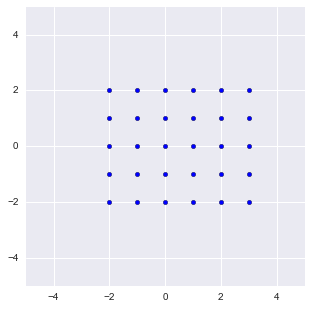

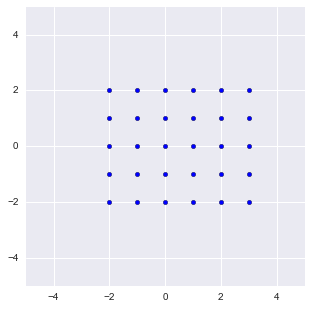

In [18]:
# Test spiral

import time
import pylab as pl
from IPython import display
plt.figure(figsize=(5,5))
pl.axis([-5,5, -5,5])
# ax.set_autoscale_on(False)
for i in range(30):
    x,y = spiral_walk(i)
    plt.scatter(x, y)
    display.clear_output(wait=True)
    print(spiral_walk(i))
    display.display(pl.gcf())
    time.sleep(0.3)

In [19]:
def create_coordinates(center, step_size, radius):
    '''
    Returns the coordinates list for crawling
    
    center: lat/lon
    step_size: meters
    radius: kilometers
    '''
    # Variable init
    spiral_step = 0
    coordinates = []
    
    # Calculate boundaries
    maxAngle = geo_angle(radius)
    stepAngle = geo_angle(step_size/1000)
    
    while True:
    
        lon_idx,lat_idx = spiral_walk(spiral_step)
        deltaLat = stepAngle*lat_idx
        deltaLon = stepAngle*lon_idx
        
        if (np.abs(deltaLat) > maxAngle or np.abs(deltaLon) > maxAngle):
            #more intuitive but less efficient condition: geo_distance(center,[lat,lon] > radius))
            break
            
        lat = center[0] + deltaLat
        lon = center[1] + deltaLon

        coordinates.append([lat, lon])
 
        spiral_step = spiral_step + 1
    
    print('Number of blocks in coordinates: ',len(coordinates))
    
    return coordinates

In [20]:
# Test coordinates

print(create_coordinates([47.375854, 8.537451], 350, 1))

Number of blocks in coordinates:  25
[[47.375853999999997, 8.5374510000000008], [47.375853999999997, 8.5405951034944199], [47.378998103494418, 8.5405951034944199], [47.378998103494418, 8.5374510000000008], [47.378998103494418, 8.5343068965055817], [47.375853999999997, 8.5343068965055817], [47.372709896505576, 8.5343068965055817], [47.372709896505576, 8.5374510000000008], [47.372709896505576, 8.5405951034944199], [47.372709896505576, 8.5437392069888372], [47.375853999999997, 8.5437392069888372], [47.378998103494418, 8.5437392069888372], [47.382142206988831, 8.5437392069888372], [47.382142206988831, 8.5405951034944199], [47.382142206988831, 8.5374510000000008], [47.382142206988831, 8.5343068965055817], [47.382142206988831, 8.5311627930111644], [47.378998103494418, 8.5311627930111644], [47.375853999999997, 8.5311627930111644], [47.372709896505576, 8.5311627930111644], [47.369565793011162, 8.5311627930111644], [47.369565793011162, 8.5343068965055817], [47.369565793011162, 8.537451000000000

In [21]:
# Display coordinates

import folium
from IPython.core.display import display, HTML

center = [46.5196535, 6.6322734] #[47.375854, 8.537451]
latlon = create_coordinates(center, 350, 1)

mapit = folium.Map(location=center, zoom_start=15)
for coord in latlon:
    folium.Marker( location=[ coord[0], coord[1] ]).add_to( mapit )

mapit.save('map.html')

from IPython.display import IFrame
IFrame('map.html', width=900, height=500)

Number of blocks in coordinates:  25


### Create coordinates df covering Zurich - if not yet created

In [22]:
def create_coordinates_df(path, coordinates):
    pickle_available = os.path.isfile(path)
    incorrect_pickle = False
    if pickle_available:
        print('Pickle available. Loading.')
        coordinates_df = pd.read_pickle(path)
        if len(coordinates) != coordinates_df.shape[0]:
            print('Shape of loaded pickle is incorrect.')
            incorrect_pickle = True
    elif not pickle_available or incorrect_pickle:
        print('Creating coordinates DataFrame and saving it to pickle.')
        coordinates = np.array(coordinates)
        coordinates_df = pd.DataFrame(coordinates)
        coordinates_df.columns = ['Latitude', 'Longitude']
        coordinates_df['Crawled'] = False
        coordinates_df.to_pickle(path)
    return coordinates_df

In [23]:
zurich_center = [47.375854, 8.537451]
zurich_coordinates = create_coordinates(zurich_center, 350, 9.4)
zurich_coordinates_df = create_coordinates_df('zurich_coordinates.pickle', zurich_coordinates)

# Plan is to plug this zurich_coordinates_df into crawl_city and change the Crawled flag into True 
# after each successfull Factual-API crawl and store it in the same pickle afterwards

Number of blocks in coordinates:  2809
Pickle available. Loading.


### Create coordinates covering Lausanne- if not yet created

In [24]:
lausanne_center = [46.5196535, 6.6322734]
lausanne_coordinates = create_coordinates(lausanne_center, 350, 6.5)
lausanne_coordinates_df = create_coordinates_df('lausanne_coordinates.pickle', lausanne_coordinates)

# Plan is to plug this lausanne_coordinates_df into crawl_city and change the Crawled flag into True 
# after each successfull Factual-API crawl and store it in the same pickle afterwards

Number of blocks in coordinates:  1369
Pickle available. Loading.


In [25]:
from shapely.geometry import Point

def crawl_city(crawled_city_path, coordinates_path, coordinates_df, step_size):
    '''
    Crawls location tagged venues of a city received from Factual API and saves it to a geopandas file with the city name. 
    '''
    # Assumptions and init
    city_table = pd.DataFrame()
    

    # Do iterative API calls. We are limited to 10k/per day
    for index, row in tqdm(coordinates_df.iterrows()):
        
        if row['Crawled'] == True:
            continue
        
        offset = 0
        while (offset <= 450):
            try:
                block_json = places.geo(center_square([row['Latitude'], row['Longitude']], step_size)).offset(offset).limit(50).data()
            except:
                print("Unexpected error:", sys.exc_info()[0])
                # I am not sure what happens when Factual-API call limit is reached
                print("Factual API returned: ", block_json)
                raise

            if (len(block_json) <= 0):
                break
                
            # Parse jsons to geopandas (include cityname & block coordinate!)
            block_df = json_normalize(block_json)
            
            # Assign lat lon to geometry
            block_df["geometry"] = block_df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
            #del(places["latitude"], places["longitude"]) Drop or top?

            # Append to city_table
            city_table = city_table.append(block_df)
            
            offset = offset + 50
        
        coordinates_df.loc[index, 'Crawled'] = True
            
    # Convert to a GeoDataFrame
    city_table_geo = gpd.GeoDataFrame(city_table, geometry="geometry")
            
    # Save geopandas to file
    city_table_geo.to_pickle(crawled_city_path)
    
    # Update coordinates file
    coordinates_df.to_pickle(coordinates_path)
    return city_table_geo, coordinates_df

In [27]:
# Test city crawler
lausanne_center = [46.5196535, 6.6322734]
lausanne_xxsmall = create_coordinates(lausanne_center, 350, 0.5)
lausanne_xxsmall_coordinates_df = create_coordinates_df('lausanne_xxsmall_coordinates.pickle', lausanne_xxsmall)


crawled_lausanne_xxsmall_df, coordinates_df = crawl_city('crawled_lausanne_xxsmall_coordinates.pickle',
                                                 'lausanne_xxsmall_coordinates.pickle',
                                                 lausanne_xxsmall_coordinates_df,
                                                 350
                                                )
print(crawled_lausanne_xxsmall_df.shape)

0it [00:00, ?it/s]

Number of blocks in coordinates:  9
Creating coordinates DataFrame and saving it to pickle.


9it [00:29,  3.04s/it]

(3696, 30)


In [28]:
crawled_lausanne_xxsmall_df

,address,category_ids,category_labels,country,edge_attributes.address,edge_attributes.address_extended,edge_attributes.locality,edge_attributes.postcode,email,factual_id,...,hours_display,latitude,locality,longitude,name,neighborhood,postcode,region,tel,website
0,Rue du Grand-Chêne 7-9,[436],"[[Travel, Lodging, Hotels and Motels]]",ch,NaN,NaN,NaN,NaN,NaN,7f827ab5-d759-4a4f-b097-7fe5d8cb5e6c,...,Open Daily 00:00-23:59,46.519577,Lausanne,6.631063,Lausanne Palace & Spa,NaN,1002,Vaud,021 331 31 31,http://www.lausanne-palace.ch
1,Place Saint-François 2,"[347, 341, 342]","[[Social, Food and Dining, Restaurants], [Soci...",ch,NaN,NaN,NaN,NaN,contact@cafe-romand.ch,7b4b8a4a-601b-4c20-8250-585c49a4fd5f,...,Mon-Sat 8:00-23:59,46.519874,Lausanne,6.632516,Café Romand,[Centre],1003,Vaud,021 312 63 75,http://www.caferomand.com/
2,Rue Centrale 4,"[347, 341, 312]","[[Social, Food and Dining, Restaurants], [Soci...",ch,NaN,NaN,NaN,NaN,NaN,56c745d9-a4e9-4527-824e-0e1d9af5f097,...,"Mon-Sat 11:30-13:30, 17:30-21:30; Sun 17:30-21:30",46.520609,Lausanne,6.632493,Les Brasseurs,NaN,1003,Vaud,021 351 14 24,http://www.les-brasseurs.ch
3,Avenue Sainte-Luce 1,[436],"[[Travel, Lodging, Hotels and Motels]]",ch,NaN,NaN,NaN,NaN,info@elite-lausanne.ch,bad577fa-419d-47b5-aebf-ac3044123692,...,Open Daily 00:00-23:59,46.518183,Lausanne,6.631169,Hotel Elite,NaN,1003,Vaud,021 320 23 61,http://www.elite-lausanne.ch
4,Rue Centrale 15,[80],"[[Healthcare, Pharmacies]]",ch,NaN,NaN,NaN,NaN,NaN,7cbe2da8-333c-45b8-bb28-50f863f5d20e,...,Mon 10:00-18:30; Tue-Fri 8:00-18:30; Sat 9:00-...,46.521029,Lausanne,6.633765,Pharmacie Nouvelle,NaN,1003,Vaud,021 323 84 84,http://www.pharmacieplus.ch/
5,Place Saint-François 1,"[342, 347]","[[Social, Food and Dining, Cafes, Coffee and T...",ch,NaN,NaN,NaN,NaN,NaN,483c0b49-ddbb-464d-a0ae-1ca2dd23ec86,...,NaN,46.519928,Lausanne,6.632186,Nespresso Boutique,NaN,1003,Vaud,0800 555 253,http://www.nespresso.com
6,Rue Pepinet 3,[347],"[[Social, Food and Dining, Restaurants]]",ch,NaN,Vaud,NaN,NaN,reservations@eat-me.ch,11b2af34-485c-40dc-a58c-d5d1f8feb7a3,...,"Tue-Thu 12:00-23:59; Fri 00:00-1:00, 12:00-23:...",46.520199,Lausanne,6.632264,Eat Me,NaN,1003,Vaud,021 311 76 59,http://eat-me.ch
7,Rue du Grand-Chêne 7,"[356, 341]","[[Social, Food and Dining, Restaurants, French...",ch,NaN,NaN,NaN,NaN,reservation@lausanne-palace.ch,075e7ea9-bd4b-492a-b813-8914dcf86e18,...,"Mon 11:00-15:00, 18:00-22:00; Tue 11:00-14:00,...",46.519592,Lausanne,6.631104,Brasserie du Grand-Chêne,[Centre],1003,Vaud,021 331 32 24,http://www.lausanne-palace.com
8,Place Saint-François 15,[51],"[[Community and Government, Post Offices]]",ch,NaN,NaN,NaN,NaN,NaN,9ce48a39-c76e-41b5-84bd-53b88d91de9c,...,"Mon 7:00-17:00; Tue 7:00-9:00, 11:00-17:00; We...",46.519386,Lausanne,6.633026,La Poste,NaN,1003,Vaud,0848 888 888,http://www.post.ch/
9,Place Pépinet 3,[142],"[[Retail, Fashion]]",ch,NaN,NaN,NaN,NaN,lausanne@natureetdecouvertes.ch,c07e9427-6310-45f2-8981-9ce8f3f7a43f,...,Mon-Fri 9:00-19:00; Sat 9:00-18:00,46.521023,Lausanne,6.632635,Nature et Découvertes,NaN,1003,Vaud,021 331 22 30,http://www.natureetdecouvertes.ch/


In [29]:
coordinates_df

,Latitude,Longitude,Crawled
0,46.519653,6.632273,True
1,46.519653,6.635418,True
2,46.522798,6.635418,True
3,46.522798,6.632273,True
4,46.522798,6.629129,True
5,46.519653,6.629129,True
6,46.516509,6.629129,True
7,46.516509,6.632273,True
8,46.516509,6.635418,True


## Lausanne crawl

In [31]:
crawled_lausanne_df, lausanne_new_coordinates_df = crawl_city('lausanne_crawled.pickle',
                                                 'lausanne_coordinates.pickle',
                                                 lausanne_coordinates_df,
                                                 350
                                                )

1369it [13:56,  2.67it/s]


In [ ]:
# Reread saved GeoDataFrame after crawling

recycled_city = pd.read_pickle('zurich.pickle')
recycled_city_geo = gpd.GeoDataFrame(recycled_city, geometry="geometry")
recycled_city_geo

_________
General TODOs:

 - Crawl them cities boyyy!!! :D